In [4]:
#Lending Club Case Study    
#Business Requirement 
#This case study is to analyse the the existing data and make a smart decisions on Approval / Reject loan applications.
#Banks should get a probability base on analysis to understand whether applicant is going to repay the loan. This study
#also should give some guidance set of customers not paying the installments etc.
    
#Import of libraries  import pandas as pd
    
# Set mamixum no of rows to be displayed on the page
import pandas as pds
pan.options.display.max_rows = 4000
    
#loading data file which contains various data points for analysis
lcloans = pds.read_csv("loan.csv",encoding='ISO-8859-1',low_memory=False)
lcloans['int_rate']=lcloans['int_rate'].str.split('%').str[0].astype(float)

In [6]:
#Display load data after the format.
lcloans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [7]:
#Data frame summary
lcloans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(75), int64(13), object(23)
memory usage: 33.6+ MB


In [12]:
#Data cleaning Start 
#Getting null percentage on each column
#Drop unuseful/null columns from the dataset
null_values = round(100*(lcloans.isnull().sum()/len(lcloans.id)),2)
null_values.loc[null_values>0]


emp_title                           6.19
emp_length                          2.71
desc                               32.58
title                               0.03
mths_since_last_delinq             64.66
mths_since_last_record             92.99
revol_util                          0.13
last_pymnt_d                        0.18
next_pymnt_d                       97.13
last_credit_pull_d                  0.01
collections_12_mths_ex_med          0.14
mths_since_last_major_derog       100.00
annual_inc_joint                  100.00
dti_joint                         100.00
verification_status_joint         100.00
tot_coll_amt                      100.00
tot_cur_bal                       100.00
open_acc_6m                       100.00
open_il_6m                        100.00
open_il_12m                       100.00
open_il_24m                       100.00
mths_since_rcnt_il                100.00
total_bal_il                      100.00
il_util                           100.00
open_rv_12m     

In [52]:
#Remove columns not useful/null and focus on relevant and important columns
uplndata = lcloans[['member_id','loan_amnt','term','int_rate','grade','sub_grade','emp_length','home_ownership','annual_inc','verification_status','dti','issue_d','loan_status','purpose','title','addr_state','delinq_2yrs']].copy()
uplndata.shape

(39717, 17)

In [32]:
uplndata.head()

,member_id,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,dti,issue_d,loan_status,purpose,title,addr_state
0,1296599,5000,36 months,10.65,B,B2,10+ years,RENT,24000.0,Verified,27.65,Dec-11,Fully Paid,credit_card,Computer,AZ
1,1314167,2500,60 months,15.27,C,C4,< 1 year,RENT,30000.0,Source Verified,1.00,Dec-11,Charged Off,car,bike,GA
2,1313524,2400,36 months,15.96,C,C5,10+ years,RENT,12252.0,Not Verified,8.72,Dec-11,Fully Paid,small_business,real estate business,IL
3,1277178,10000,36 months,13.49,C,C1,10+ years,RENT,49200.0,Source Verified,20.00,Dec-11,Fully Paid,other,personel,CA
4,1311748,3000,60 months,12.69,B,B5,1 year,RENT,80000.0,Source Verified,17.94,Dec-11,Current,other,Personal,OR


In [33]:
uplndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   member_id            39717 non-null  int64  
 1   loan_amnt            39717 non-null  int64  
 2   term                 39717 non-null  object 
 3   int_rate             39717 non-null  float64
 4   grade                39717 non-null  object 
 5   sub_grade            39717 non-null  object 
 6   emp_length           38642 non-null  object 
 7   home_ownership       39717 non-null  object 
 8   annual_inc           39717 non-null  float64
 9   verification_status  39717 non-null  object 
 10  dti                  39717 non-null  float64
 11  issue_d              39717 non-null  object 
 12  loan_status          39717 non-null  object 
 13  purpose              39717 non-null  object 
 14  title                39706 non-null  object 
 15  addr_state           39717 non-null 

In [34]:
uplndata.isnull().sum()

member_id                 0
loan_amnt                 0
term                      0
int_rate                  0
grade                     0
sub_grade                 0
emp_length             1075
home_ownership            0
annual_inc                0
verification_status       0
dti                       0
issue_d                   0
loan_status               0
purpose                   0
title                    11
addr_state                0
dtype: int64

In [35]:
# verify if any duplicates in the updated loan data
uplndata.duplicated().sum()

0

<AxesSubplot:title={'center':'Over view of Fully Paid vs Chargeed Off'}, ylabel='loan_status'>

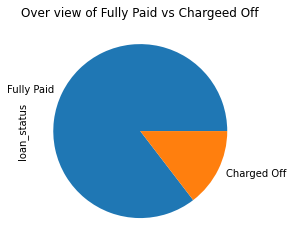

In [38]:
#Analysis Started with cleaned data
import matplotlib.pyplot as plt

uplndata = uplndata[uplndata['loan_status'] != 'Current']
uplndata['loan_status'].value_counts().plot(kind='pie',title='Over view of Fully Paid vs Chargeed Off')

<AxesSubplot:>

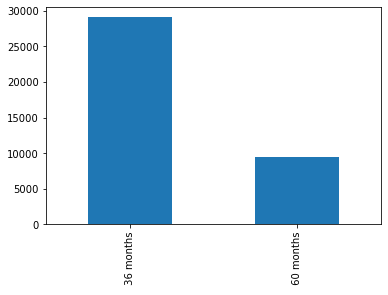

In [40]:
#Displaying Loan Terms across data
uplndata['term'].value_counts().plot(kind='bar')

In [44]:
#Finding the interest Rates 
uplndata['int_rate'].describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

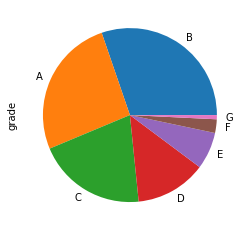

In [45]:
# Finding the grade vise no. of loans 
uplndata['grade'].value_counts().plot.pie()
plt.show()

<AxesSubplot:xlabel='verification_status'>

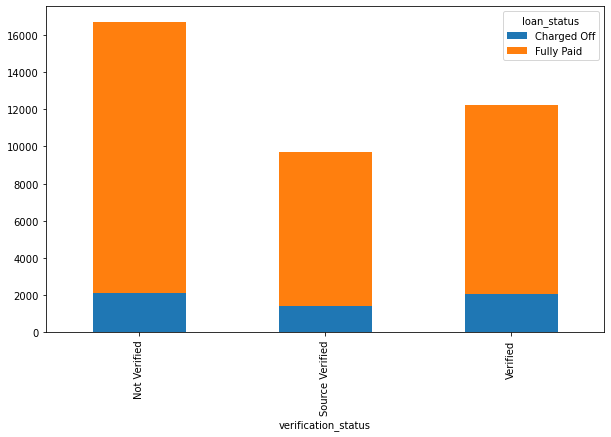

In [48]:
# loan_status vs grade
uplndata.groupby('verification_status')['loan_status'].value_counts().unstack().plot(kind='bar',stacked=True,figsize =(10,6))

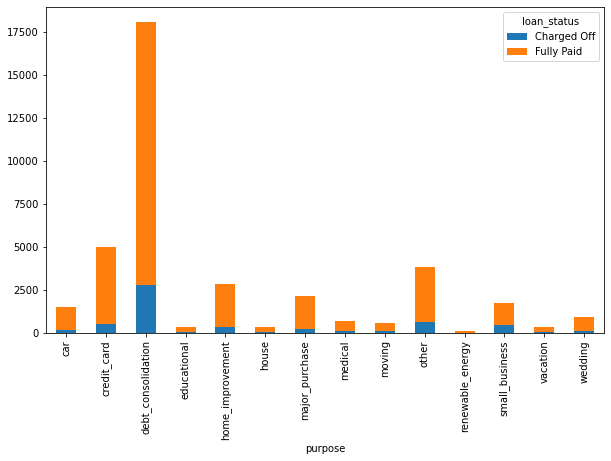

In [49]:
uplndata.groupby('purpose')['loan_status'].value_counts().unstack().plot(kind='bar',stacked=True,figsize =(10,6))
plt.show()

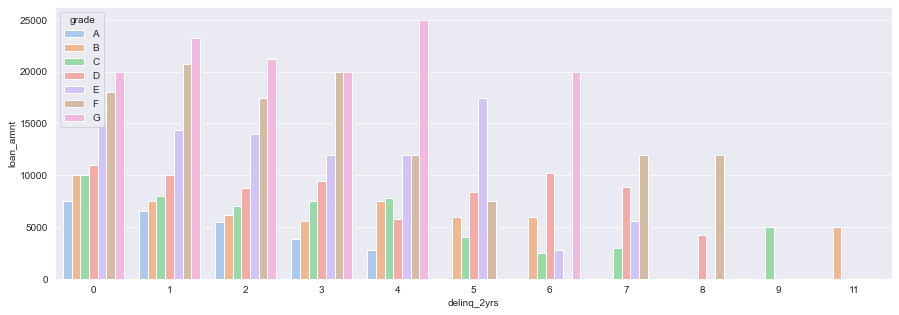

In [53]:
import seaborn as sns

#Setting color and theme for visualization
sns.set_style('darkgrid') 
sns.set_palette('pastel')

plt.figure(figsize=(15,5))
sns.barplot(x='delinq_2yrs', y='loan_amnt', hue='grade',data=uplndata, estimator=np.median, ci=None, hue_order =sorted(uplndata.grade.unique()))
plt.show()

#Higher the delinq_2yrs > 1 with higher loanamnt has lower the grades. Which shows that this combination could be risky.